<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
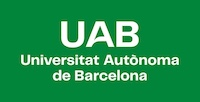
</div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>University Master's Degree in Computer Vision</b></p>
    <p style="margin: 0; text-align:right;">Reinforcement Learning</p>
    <p style="margin: 0; text-align:right;">Computer Vision Center (CVC)</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

# Graph Neural Networks (GNN)

## Example of Graph Convolutional Network (GCN) and Brain Networks

Magnetic Resonance Imaging (MRI) has emerged as a pivotal tool in neuroimaging, particularly in the realm of understanding brain networks and pathologies such as multiple sclerosis (MS). In the context of MS diagnosis and research, MRI offers unparalleled insights into the structural and functional alterations within the brain. One key application lies in the analysis of brain networks, which are intricate systems of interconnected regions responsible for various cognitive and motor functions. By leveraging advanced imaging techniques, researchers can map these networks and discern aberrations associated with MS.

In studies differentiating healthy volunteers from individuals with MS, MRI-based analysis of brain networks becomes instrumental. Through techniques like functional MRI (rs-fMRI) and diffusion tensor imaging (DTI), researchers can examine both functional connectivity and structural integrity within these networks. Functional connectivity measures the temporal correlations of brain activity among spatially distinct regions, while DTI provides information about the integrity of white matter tracts connecting these regions. Disruptions in either of these aspects can serve as biomarkers for MS-related pathology. Moreover, advanced machine learning algorithms trained on MRI data can effectively classify individuals, distinguishing healthy controls from MS patients with a high degree of accuracy. These classifiers capitalize on patterns of connectivity or structural alterations characteristic of MS, aiding in early diagnosis and monitoring of the disease progression.

Overall, MRI-based analysis of brain networks stands as a promising avenue for delineating between healthy individuals and those afflicted by MS. By unraveling the complexities of neural connectivity and structural integrity, researchers can not only enhance diagnostic accuracy but also gain deeper insights into the underlying mechanisms of MS pathology, ultimately paving the way for more effective therapeutic interventions and personalized treatment strategies.

## 1. Data loading

The first step to solve this problem is, obviously, to load the data in _numpy_ array or _pandas_ dataframe.

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
basepath = "./data"
basepath_FA = os.path.join(basepath, "FA")
basepath_GM = os.path.join(basepath, "GM")
basepath_RS = os.path.join(basepath, "RS")

According to the labels, people in this cohort are classified in four groups:
- **Healthy volunteers** (controls, _mstype = -1_): People without MS.
- **Relapsing remitting MS** (RRMS, _mstype = 0_) is a type of MS where you have relapses (symptoms getting worse) followed by recovery (that's when it's “remitting”). Your disability doesn't get worse between relapses but after each relapse it can end up worse than before.
- **Secondary progressive MS** (SPMS, _mstype = 1_) follows the initial course of relapsing-remitting MS (RRMS). Some people who are diagnosed with RRMS eventually go on to have a secondary progressive course, in which neurologic function worsens over time and disability increases.
- **Primary progressive MS** (PPMS, _mstype = 2_). If you have PPMS, you will experience gradually worsening neurologic symptoms and an accumulation of disability. You will not have relapses, or attacks, early in the disease course.

In [6]:
CT_CONTROL = -1
CT_RRMS = 0
CT_SPMS = 1
CT_PPMS = 2

In [7]:
df = pd.read_csv(os.path.join(basepath, "demographics.csv"))
df

,id,mstype
0,0,1
1,1,2
2,2,0
3,3,0
4,4,0
...,...,...
160,160,-1
161,161,-1
162,162,-1
163,163,-1


In [8]:
target = df["mstype"].values
target

array([ 1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  1,  1,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  2,  0,  2, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  1,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  1, -1, -1, -1, -1, -1, -1, -1, -1])

In order to simplify the problem, we group all types of people into:
- **Healthy volunteers** (HV), mstype == -1
- **People with MS** (pwMS), mstype == 0, 1, 2

In [9]:
# Transform target to 0 -> HV; 1 -> MS
target = target + 1
target[target > 1] = 1
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

Check the number of subjects in each category:

In [10]:
pd.Series(target).value_counts()

1    147
0     18
Name: count, dtype: int64

Create a list with all input filenames, using the ID of each subject.

In [11]:
filenames = ["{:04d}.csv".format(x) for x in df["id"]]
filenames

['0000.csv',
 '0001.csv',
 '0002.csv',
 '0003.csv',
 '0004.csv',
 '0005.csv',
 '0006.csv',
 '0007.csv',
 '0008.csv',
 '0009.csv',
 '0010.csv',
 '0011.csv',
 '0012.csv',
 '0013.csv',
 '0014.csv',
 '0015.csv',
 '0016.csv',
 '0017.csv',
 '0018.csv',
 '0019.csv',
 '0020.csv',
 '0021.csv',
 '0022.csv',
 '0023.csv',
 '0024.csv',
 '0025.csv',
 '0026.csv',
 '0027.csv',
 '0028.csv',
 '0029.csv',
 '0030.csv',
 '0031.csv',
 '0032.csv',
 '0033.csv',
 '0034.csv',
 '0035.csv',
 '0036.csv',
 '0037.csv',
 '0038.csv',
 '0039.csv',
 '0040.csv',
 '0041.csv',
 '0042.csv',
 '0043.csv',
 '0044.csv',
 '0045.csv',
 '0046.csv',
 '0047.csv',
 '0048.csv',
 '0049.csv',
 '0050.csv',
 '0051.csv',
 '0052.csv',
 '0053.csv',
 '0054.csv',
 '0055.csv',
 '0056.csv',
 '0057.csv',
 '0058.csv',
 '0059.csv',
 '0060.csv',
 '0061.csv',
 '0062.csv',
 '0063.csv',
 '0064.csv',
 '0065.csv',
 '0066.csv',
 '0067.csv',
 '0068.csv',
 '0069.csv',
 '0070.csv',
 '0071.csv',
 '0072.csv',
 '0073.csv',
 '0074.csv',
 '0075.csv',
 '0076.csv',

The following lines of code will create a **4D _numpy_ array** (`data`) to store the whole dataset:
- The shape of the array should be: _(num_subjects, num_nodes, num_nodes, num_matrices)_

where:
- "num_subjects" is 165,
- "nun_nodes" is 76 (parcellation scheme)
- "num_matrices" is 3 (DTI, GM and rs-fMRI)

In [12]:
data = np.zeros(shape=(len(filenames), 76, 76, 3))

for i, filename in enumerate(filenames):
    df = pd.read_csv(os.path.join(basepath_FA, filename), header=None)
    data[i,:,:,0] = df.values
    
    df = pd.read_csv(os.path.join(basepath_GM, filename), header=None)
    data[i,:,:,1] = df.values
    
    df = pd.read_csv(os.path.join(basepath_RS, filename), header=None)
    data[i,:,:,2] = df.values

print(data.shape)

(165, 76, 76, 3)


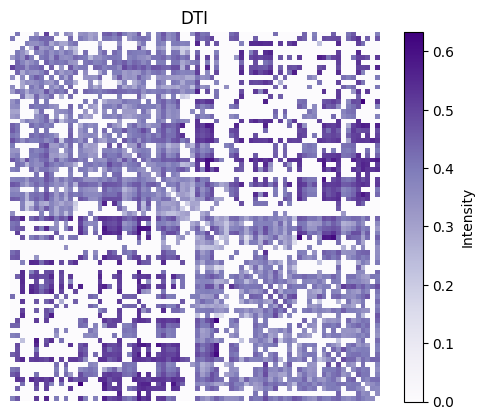

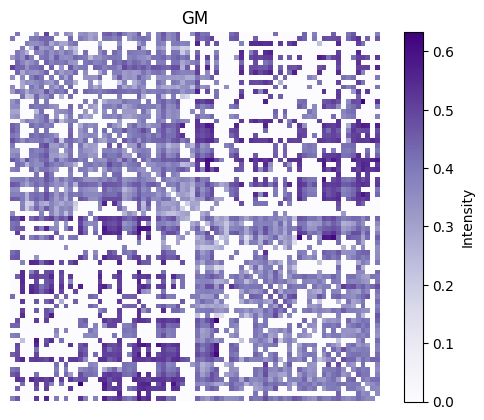

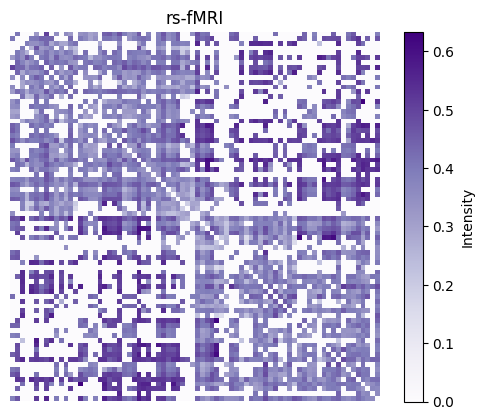

In [13]:
import matplotlib.pyplot as plt

modalities = ["DTI", "GM", "rs-fMRI"]

for modality in modalities:
    plt.imshow(data[0, :, :, 0], cmap='Purples')  # or another colormap
    plt.colorbar(label='Intensity')
    plt.title(modality)
    plt.axis('off')  # Optional: hide axes
    plt.show()


Check quantiles and % of pwMS

In [14]:
print("QUANTILES")
for q in np.linspace(0, 1, 11):
    print("{:.2f} -> {:.4f}".format(q, np.quantile(data[:, :, :, :], q)))

QUANTILES
0.00 -> 0.0000
0.10 -> 0.0000
0.20 -> 0.0122
0.30 -> 0.0305
0.40 -> 0.0615
0.50 -> 0.1170
0.60 -> 0.2123
0.70 -> 0.3241
0.80 -> 0.4037
0.90 -> 0.4767
1.00 -> 1.0000


In [15]:
prop = np.where(target == 1)[0].shape[0] / target.shape[0]
print("% of pwMS: {:.4f}".format(prop))

% of pwMS: 0.8909


## 2. Creating the data structures from adjacency matrices

The `array_to_graph` function creates a [Data](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.data.Data.html) structure from the DTI, GM and rs-fMRI adjacency matrices for each subject in the dataset.

The **input** parameter `data` should be an `np.array` of shape (76, 76, 3), where each adjacency matrix is stored at _(:,:,i)_.

The **output** is `Data` object that contains a pseudo-graph, since edges from every layer are collapsed into this pseudo-graph. Thus, it is an extremely dense graph (probably, all possible edges exist in these graphs!).

In [56]:
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import StandardScaler
import numpy as np

def normalize_features(features):
    bias = features[:, :1]  # keep bias term as-is
    to_normalize = features[:, 1:]

    scaler = StandardScaler()
    normalized = scaler.fit_transform(to_normalize)

    return np.concatenate([bias, normalized], axis=1)

def array_to_graph(data, y, th=0.0):
    num_nodes = data.shape[0]
    node_dim = 1
    
    edge_index = []
    edge_weight = []
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                if data[i, j, 0] >= th:
                    edge_index.append([i, j])
                    edge_weight.append(data[i, j, 0])
                
                if data[i, j, 1] >= th:
                    edge_index.append([i, j])
                    edge_weight.append(data[i, j, 1])
                
                if data[i, j, 2] >= th:
                    edge_index.append([i, j])
                    edge_weight.append(data[i, j, 2])
        
    y = torch.tensor([int(y)], dtype=torch.long)
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    x = torch.tensor(normalize_features(feature(data)), dtype=torch.float)
    # x = torch.tensor(np.ones(shape=(num_nodes, node_dim)), dtype=torch.float)
    edge_weight = torch.tensor(edge_weight, dtype=torch.float)
    
    data = Data(x=x, edge_index=edge_index.t().contiguous(), edge_weight=edge_weight, y=y)
    
    return data

In [57]:
from tqdm import tqdm
import networkx as nx
def extract_graph_features(adj_matrix, threshold=0.0):
    adj = adj_matrix.copy()
    adj[adj < threshold] = 0
    G = nx.from_numpy_array(adj, create_using=nx.Graph)

    degree = dict(G.degree(weight=None))
    weighted_degree = dict(G.degree(weight='weight'))
    # clustering = nx.clustering(G, weight='weight')
    betweenness = nx.betweenness_centrality(G, weight='weight', normalized=True)
    closeness = nx.closeness_centrality(G, distance='weight')

    features = []
    for node in G.nodes:
        features.append([
            degree[node],
            weighted_degree[node],
            # clustering[node],
            betweenness[node],
            closeness[node]
        ])
    
    return np.array(features)  # (76, 5)

def feature(data):
    subject_feats = []

    for ch in range(3):  # for SC, GM, fMRI
        adj = data[:, :, ch]
        feats = extract_graph_features(adj)  # (76, 4)
        subject_feats.append(feats)

    # Concatenate features from all 3 matrices → (76, 12)
    subject_feats = np.concatenate(subject_feats, axis=1)
    subject_feats = np.concatenate([np.ones((subject_feats.shape[0],1)), subject_feats], axis=1)

    return subject_feats  # shape: (76, 15)

## 3. Defining the Graph Convolutional Network (GCN)

The `GCN` class defines:
1. The class constructor
2. The `forward` method defines the computation performed at every call.

In [58]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_max_pool

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(13, 128)
        self.conv2 = GCNConv(128, 128)
        self.conv3 = GCNConv(128, 128)
        self.conv4 = GCNConv(128, 128)
        self.conv5 = GCNConv(128, 128)
        self.lin1 = torch.nn.Linear(128, 64)
        self.lin2 = torch.nn.Linear(64, 16)
        self.lin3 = torch.nn.Linear(16, 2)

    def forward(self, data):
        x, edge_index, edge_weight, batch = data.x, data.edge_index, data.edge_weight, data.batch
        
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight)
        x = F.relu(x)
        # x = self.conv3(x, edge_index, edge_weight)
        # x = F.relu(x)
        # x = self.conv4(x, edge_index, edge_weight)
        # x = F.relu(x)
        # x = self.conv5(x, edge_index, edge_weight)
        # x = F.relu(x)
        x = global_max_pool(x, batch)
        x = self.lin1(x)
        x = F.relu(x)
        x = self.lin2(x)
        x = F.relu(x)
        x = self.lin3(x)

        return x

In this example, we use the CPU to perform the training (it will last for 5–10 minutes).

In [59]:
device = torch.device('cuda')

## 4. Training loop

This is the main training loop, where:
1. We define the $k$-fold cross-validation (`StratifiedKFold`)
2. For each fold:
  - Create the model, optimizer, and loss function.
  - Load the train dataset in `DataLoader` and define the batches.
  - Execute the forward and backward steps
3. Load the test dataset in `DataLoader` and define the batches.
4. Test the model and compute the performance metrics.

In [60]:
from torch_geometric.loader import DataLoader
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

skf = StratifiedKFold(n_splits=10)

NUM_EPOCHS = 20
preds = np.zeros(data.shape[0])
fold = 0

for train_index, test_index in skf.split(data, target):
    fold += 1
    print("Fold: {}".format(fold))

    # split dataset
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
    prop_train = np.where(y_train == 1)[0].shape[0] / y_train.shape[0]
    prop_test = np.where(y_test == 1)[0].shape[0] / y_test.shape[0]
    print("Train set size     : {}".format(X_train.shape))
    print("Test set size      : {}".format(X_test.shape))
    print("Train set % of pwMS: {:.4f} ({})".format(prop_train, y_train.sum()))
    print("Test set % of pwMS : {:.4f} ({})".format(prop_test, y_test.sum()))

    # list of Data structures (one for each subject)
    train_graphs = []
    for i in tqdm(range(X_train.shape[0])):
        g = array_to_graph(X_train[i], y_train[i])
        train_graphs.append(g)
        
    test_graphs = []
    for i in tqdm(range(X_test.shape[0])):
        g = array_to_graph(X_test[i], y_test[i])
        test_graphs.append(g)

    # create the model
    model = GCN()
    model = model.to(device)
    # optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # loss function
    loss_fn = torch.nn.BCEWithLogitsLoss()

    # train function
    def train():
        model.train()
        
        train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)

        loss_all = 0
        for batch in train_loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            output = model(batch)
            label = batch.y
            label = F.one_hot(label, num_classes=2)
            label = label.type(torch.FloatTensor)
            label = label.to(device)
            loss = loss_fn(output, label)
            loss.backward()
            loss_all += batch.num_graphs * loss.item()
            optimizer.step()

        return loss_all / len(train_graphs)

    # train for N epochs
    for epoch in range(NUM_EPOCHS):
        loss_value = train()
        print("Train loss at epoch {}: {:.4f}".format(epoch + 1, loss_value))

    # test phase 
    test_loader = DataLoader(test_graphs, batch_size=len(test_graphs), shuffle=False)
    
    for batch in test_loader:
        batch = batch.to(device)
        test_preds = F.softmax(model(batch), dim=1).cpu().detach().numpy()
    
    test_preds = test_preds[:, 1]
    preds[test_index] = test_preds
    
    auc_roc = roc_auc_score(y_test, test_preds)
    print("Test AUC: {:.2f}".format(auc_roc))

Fold: 1
Train set size     : (148, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (132)
Test set % of pwMS : 0.8824 (15)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:08<00:00,  2.00it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6866
Train loss at epoch 2: 0.6536
Train loss at epoch 3: 0.6179
Train loss at epoch 4: 0.5599
Train loss at epoch 5: 0.4821
Train loss at epoch 6: 0.4118
Train loss at epoch 7: 0.3573
Train loss at epoch 8: 0.3472
Train loss at epoch 9: 0.3546
Train loss at epoch 10: 0.3479
Train loss at epoch 11: 0.3404
Train loss at epoch 12: 0.3375
Train loss at epoch 13: 0.3381
Train loss at epoch 14: 0.3376
Train loss at epoch 15: 0.3371
Train loss at epoch 16: 0.3376
Train loss at epoch 17: 0.3370
Train loss at epoch 18: 0.3376
Train loss at epoch 19: 0.3366
Train loss at epoch 20: 0.3362
Test AUC: 0.70
Fold: 2
Train set size     : (148, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (132)
Test set % of pwMS : 0.8824 (15)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:08<00:00,  2.01it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6936
Train loss at epoch 2: 0.6834
Train loss at epoch 3: 0.6768
Train loss at epoch 4: 0.6696
Train loss at epoch 5: 0.6579
Train loss at epoch 6: 0.6393
Train loss at epoch 7: 0.6080
Train loss at epoch 8: 0.5620
Train loss at epoch 9: 0.4961
Train loss at epoch 10: 0.4265
Train loss at epoch 11: 0.3881
Train loss at epoch 12: 0.3523
Train loss at epoch 13: 0.3444
Train loss at epoch 14: 0.3387
Train loss at epoch 15: 0.3383
Train loss at epoch 16: 0.3384
Train loss at epoch 17: 0.3393
Train loss at epoch 18: 0.3367
Train loss at epoch 19: 0.3361
Train loss at epoch 20: 0.3360
Test AUC: 0.80
Fold: 3
Train set size     : (148, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (132)
Test set % of pwMS : 0.8824 (15)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:08<00:00,  1.98it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6243
Train loss at epoch 2: 0.6109
Train loss at epoch 3: 0.5917
Train loss at epoch 4: 0.5613
Train loss at epoch 5: 0.5132
Train loss at epoch 6: 0.4444
Train loss at epoch 7: 0.3764
Train loss at epoch 8: 0.3435
Train loss at epoch 9: 0.3536
Train loss at epoch 10: 0.3536
Train loss at epoch 11: 0.3419
Train loss at epoch 12: 0.3361
Train loss at epoch 13: 0.3384
Train loss at epoch 14: 0.3380
Train loss at epoch 15: 0.3362
Train loss at epoch 16: 0.3360
Train loss at epoch 17: 0.3365
Train loss at epoch 18: 0.3369
Train loss at epoch 19: 0.3367
Train loss at epoch 20: 0.3359
Test AUC: 0.43
Fold: 4
Train set size     : (148, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (132)
Test set % of pwMS : 0.8824 (15)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:08<00:00,  1.95it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6972
Train loss at epoch 2: 0.6823
Train loss at epoch 3: 0.6733
Train loss at epoch 4: 0.6628
Train loss at epoch 5: 0.6464
Train loss at epoch 6: 0.6176
Train loss at epoch 7: 0.5711
Train loss at epoch 8: 0.5057
Train loss at epoch 9: 0.4347
Train loss at epoch 10: 0.3824
Train loss at epoch 11: 0.3610
Train loss at epoch 12: 0.3509
Train loss at epoch 13: 0.3419
Train loss at epoch 14: 0.3388
Train loss at epoch 15: 0.3369
Train loss at epoch 16: 0.3380
Train loss at epoch 17: 0.3374
Train loss at epoch 18: 0.3369
Train loss at epoch 19: 0.3366
Train loss at epoch 20: 0.3370
Test AUC: 0.67
Fold: 5
Train set size     : (148, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (132)
Test set % of pwMS : 0.8824 (15)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:08<00:00,  2.00it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6973
Train loss at epoch 2: 0.6736
Train loss at epoch 3: 0.6530
Train loss at epoch 4: 0.6244
Train loss at epoch 5: 0.5818
Train loss at epoch 6: 0.5214
Train loss at epoch 7: 0.4447
Train loss at epoch 8: 0.3675
Train loss at epoch 9: 0.3402
Train loss at epoch 10: 0.3438
Train loss at epoch 11: 0.3473
Train loss at epoch 12: 0.3442
Train loss at epoch 13: 0.3384
Train loss at epoch 14: 0.3380
Train loss at epoch 15: 0.3372
Train loss at epoch 16: 0.3380
Train loss at epoch 17: 0.3366
Train loss at epoch 18: 0.3368
Train loss at epoch 19: 0.3380
Train loss at epoch 20: 0.3372
Test AUC: 0.80
Fold: 6
Train set size     : (149, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8859 (132)
Test set % of pwMS : 0.9375 (15)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:07<00:00,  2.00it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.7246
Train loss at epoch 2: 0.7132
Train loss at epoch 3: 0.7053
Train loss at epoch 4: 0.6959
Train loss at epoch 5: 0.6821
Train loss at epoch 6: 0.6596
Train loss at epoch 7: 0.6240
Train loss at epoch 8: 0.5750
Train loss at epoch 9: 0.5199
Train loss at epoch 10: 0.4703
Train loss at epoch 11: 0.4161
Train loss at epoch 12: 0.3808
Train loss at epoch 13: 0.3585
Train loss at epoch 14: 0.3522
Train loss at epoch 15: 0.3522
Train loss at epoch 16: 0.3521
Train loss at epoch 17: 0.3501
Train loss at epoch 18: 0.3506
Train loss at epoch 19: 0.3489
Train loss at epoch 20: 0.3490
Test AUC: 0.67
Fold: 7
Train set size     : (149, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8859 (132)
Test set % of pwMS : 0.9375 (15)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:07<00:00,  2.00it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6736
Train loss at epoch 2: 0.6637
Train loss at epoch 3: 0.6493
Train loss at epoch 4: 0.6277
Train loss at epoch 5: 0.5885
Train loss at epoch 6: 0.5252
Train loss at epoch 7: 0.4446
Train loss at epoch 8: 0.3655
Train loss at epoch 9: 0.3576
Train loss at epoch 10: 0.3687
Train loss at epoch 11: 0.3590
Train loss at epoch 12: 0.3501
Train loss at epoch 13: 0.3519
Train loss at epoch 14: 0.3527
Train loss at epoch 15: 0.3509
Train loss at epoch 16: 0.3502
Train loss at epoch 17: 0.3512
Train loss at epoch 18: 0.3487
Train loss at epoch 19: 0.3489
Train loss at epoch 20: 0.3504
Test AUC: 0.67
Fold: 8
Train set size     : (149, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8926 (133)
Test set % of pwMS : 0.8750 (14)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:07<00:00,  2.01it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6107
Train loss at epoch 2: 0.5928
Train loss at epoch 3: 0.5688
Train loss at epoch 4: 0.5346
Train loss at epoch 5: 0.4781
Train loss at epoch 6: 0.4211
Train loss at epoch 7: 0.3705
Train loss at epoch 8: 0.3555
Train loss at epoch 9: 0.3550
Train loss at epoch 10: 0.3498
Train loss at epoch 11: 0.3433
Train loss at epoch 12: 0.3404
Train loss at epoch 13: 0.3401
Train loss at epoch 14: 0.3390
Train loss at epoch 15: 0.3378
Train loss at epoch 16: 0.3381
Train loss at epoch 17: 0.3372
Train loss at epoch 18: 0.3375
Train loss at epoch 19: 0.3368
Train loss at epoch 20: 0.3365
Test AUC: 1.00
Fold: 9
Train set size     : (149, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8926 (133)
Test set % of pwMS : 0.8750 (14)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:08<00:00,  2.00it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.7052
Train loss at epoch 2: 0.6927
Train loss at epoch 3: 0.6782
Train loss at epoch 4: 0.6550
Train loss at epoch 5: 0.6152
Train loss at epoch 6: 0.5559
Train loss at epoch 7: 0.4771
Train loss at epoch 8: 0.3911
Train loss at epoch 9: 0.3592
Train loss at epoch 10: 0.3550
Train loss at epoch 11: 0.3477
Train loss at epoch 12: 0.3377
Train loss at epoch 13: 0.3387
Train loss at epoch 14: 0.3407
Train loss at epoch 15: 0.3373
Train loss at epoch 16: 0.3357
Train loss at epoch 17: 0.3367
Train loss at epoch 18: 0.3368
Train loss at epoch 19: 0.3374
Train loss at epoch 20: 0.3376
Test AUC: 1.00
Fold: 10
Train set size     : (149, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8926 (133)
Test set % of pwMS : 0.8750 (14)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:08<00:00,  1.99it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.7500
Train loss at epoch 2: 0.7293
Train loss at epoch 3: 0.7126
Train loss at epoch 4: 0.6890
Train loss at epoch 5: 0.6507
Train loss at epoch 6: 0.5907
Train loss at epoch 7: 0.5081
Train loss at epoch 8: 0.4120
Train loss at epoch 9: 0.3470
Train loss at epoch 10: 0.3431
Train loss at epoch 11: 0.3549
Train loss at epoch 12: 0.3484
Train loss at epoch 13: 0.3368
Train loss at epoch 14: 0.3346
Train loss at epoch 15: 0.3361
Train loss at epoch 16: 0.3361
Train loss at epoch 17: 0.3350
Train loss at epoch 18: 0.3347
Train loss at epoch 19: 0.3342
Train loss at epoch 20: 0.3341
Test AUC: 0.68


Finally, we compute the **AUC-ROC**, **AUC-PR** and **accuracy** metrics to test the performance of the model.

In [61]:
auc_roc = roc_auc_score(target, preds)
auc_pr = average_precision_score(target, preds)
    
best_acc = 0
best_th = 0
for th in preds:
    acc = accuracy_score(target, (preds >= th).astype(int))
    if acc >= best_acc:
        best_acc = acc
        best_th = th
        
print("")
prop = np.where(target == 1)[0].shape[0] / target.shape[0]
print("% of pwMS: {:.4f}".format(prop))
print("AUC ROC  : {:.4f}".format(auc_roc))
print("AUC PR   : {:.4f}".format(auc_pr))
print("ACC      : {:.4f}".format(best_acc))


% of pwMS: 0.8909
AUC ROC  : 0.6481
AUC PR   : 0.9323
ACC      : 0.8909


## 5. Results

We plot the **ROC Curve** and **Precision Recall Curve** to analyse the performance of the model.

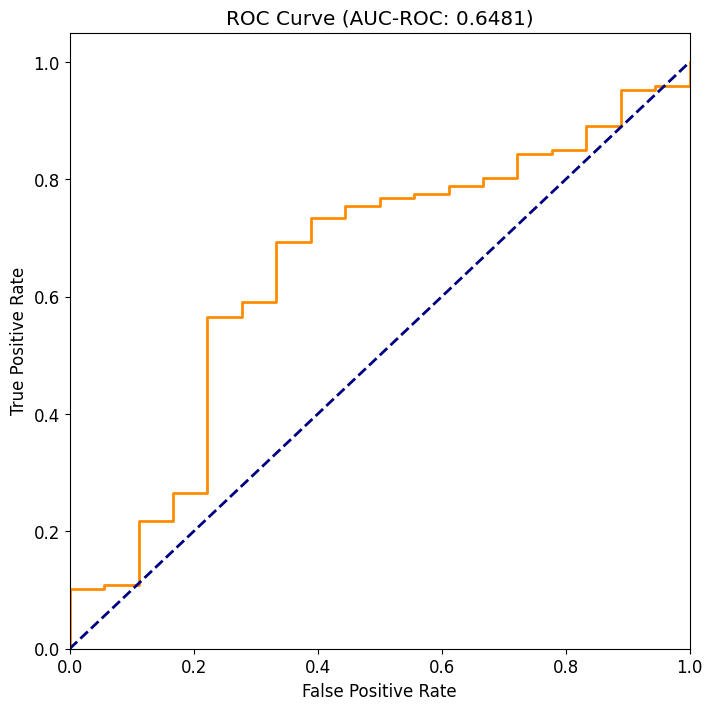

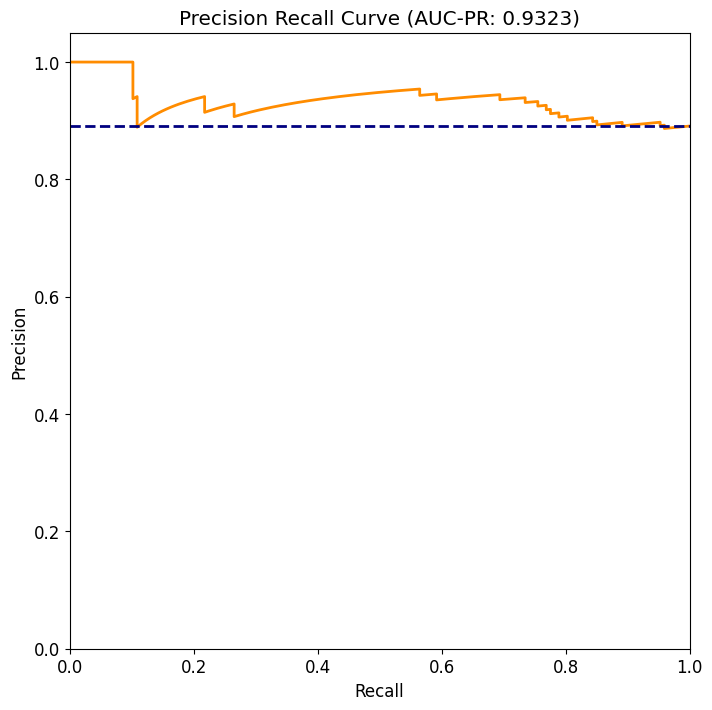

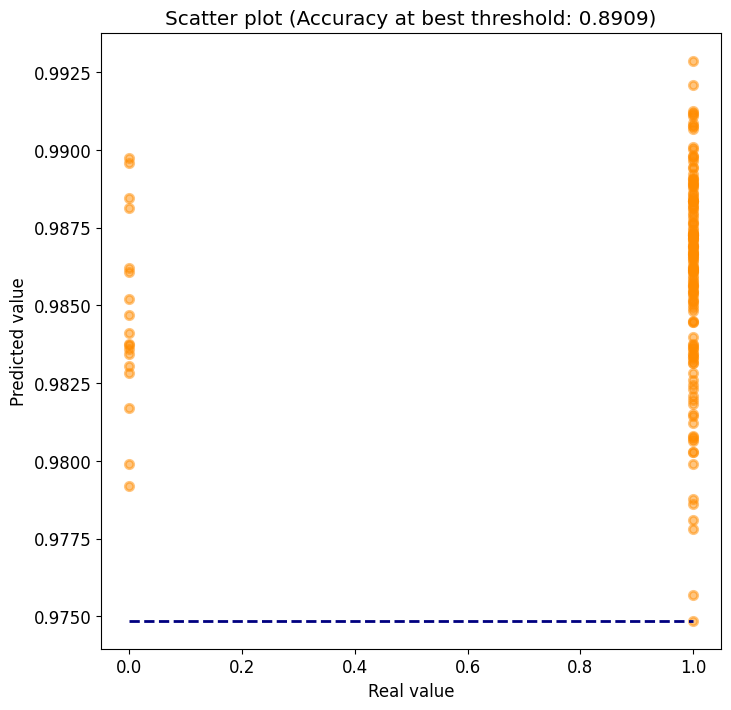

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 12


# compute AUC-ROC and ROC curve
auc_roc = roc_auc_score(target, preds)
fpr, tpr, ths = roc_curve(target, preds)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC-ROC: {:.4f})".format(auc_roc))
plt.show()

# Compute AUC-PR
auc_pr = average_precision_score(target, preds)
prec, recall, ths = precision_recall_curve(target, preds)

plt.figure()
lw = 2
plt.plot(recall, prec, color="darkorange", lw=lw)
plt.plot([0, 1], [prop, prop], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve (AUC-PR: {:.4f})".format(auc_pr))
plt.show()

# Compute ACC and threshold
best_acc = 0
best_th = 0
for th in ths:
    acc = accuracy_score(target, (preds >= th).astype(int))
    if acc >= best_acc:
        best_acc = acc
        best_th = th

plt.figure()
plt.scatter(target, preds, alpha=0.5, color="darkorange", lw=lw)
plt.plot([0, 1], [best_th, best_th], color='navy', lw=lw, linestyle='--')
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Scatter plot (Accuracy at best threshold: {:.4f})".format(best_acc))
plt.show()